#  Evolution of Movie Genres (1980–2024): A Data-Driven Look at Changing Audience Trends

###  Objective
To explore how audience preferences changed over time using IMDb-style data — analyzing genre trends, average ratings, and the rise or fall of specific genres.

###  Skills Demonstrated
- Data Cleaning and Preprocessing (Pandas, NumPy)
- Exploratory Data Analysis (EDA)
- Data Visualization (Matplotlib, Seaborn)
- Storytelling with Data

### Project Summary / Insights:
- Action and Drama are the most frequent genres across the full period (1980–2024).
- Sci-Fi and Thriller show relative growth after 2000 in our dataset, suggesting rising interest.
- Romance and Comedy show a small decline in relative share in the 2010–2020 period.
- Average IMDB ratings are relatively stable with minor fluctuations; some genres (e.g., Drama) show tighter rating distributions (higher median).
- Average movie duration gradually increased slightly after 2000 (observed in this dataset).


In [1]:
# 📚 Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

In [2]:
# 📂 Load the dataset
df = pd.read_csv("imdb_movies_sample.csv")
df.head()
# Clean column names (best practice)
df.columns = df.columns.str.strip().str.lower()


####   🧹 Data Cleaning Step: Normalized column names to lowercase to prevent case-sensitive errors in groupby and plotting.

## 🔍 Step 1: Understanding the Dataset
Let's check the basic information about the dataset, such as columns, missing values, and data types.


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1200 non-null   object 
 1   genre          1200 non-null   object 
 2   released_year  1200 non-null   int64  
 3   imdb_rating    1200 non-null   float64
 4   duration       1200 non-null   int64  
 5   votes          1200 non-null   int64  
 6   country        1200 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 65.8+ KB


title            0
genre            0
released_year    0
imdb_rating      0
duration         0
votes            0
country          0
dtype: int64

## Step 2: Data Cleaning
We'll handle duplicates, missing values, and ensure all data types are consistent.


In [4]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Check for missing values
df.isnull().sum()


title            0
genre            0
released_year    0
imdb_rating      0
duration         0
votes            0
country          0
dtype: int64

## Step 3: Exploratory Data Analysis
Let's explore trends in ratings, genres, and durations over time.


### 📊 6.1 Overall Numeric Insights
Let's begin by checking some basic statistics like the highest-rated movies, average rating, and average duration.


In [5]:
# Highest and lowest rated movies
print("Top 5 Highest Rated Movies:")
display(df.nlargest(5, 'imdb_rating')[['title', 'genre', 'imdb_rating']])

print("\nLowest Rated Movies:")
display(df.nsmallest(5, 'imdb_rating')[['title', 'genre', 'imdb_rating']])

# Average stats
print("\nAverage IMDb Rating:", round(df['imdb_rating'].mean(), 2))
print("Average Duration (mins):", round(df['duration'].mean(), 2))
print("Average Votes:", round(df['votes'].mean(), 2))


Top 5 Highest Rated Movies:


,title,genre,imdb_rating
209,Movie_3878,"Fantasy, Thriller",9.8
478,Movie_8729,"Comedy, Animation",9.6
179,Movie_1349,Thriller,9.2
654,Movie_7248,"Romance, Fantasy",9.1
755,Movie_8322,"Animation, Romance",9.1



Lowest Rated Movies:


,title,genre,imdb_rating
262,Movie_8055,Fantasy,3.5
1101,Movie_3001,"Horror, Thriller",3.6
1061,Movie_1108,Adventure,3.7
646,Movie_5329,Animation,3.8
668,Movie_1182,Drama,3.8



Average IMDb Rating: 6.54
Average Duration (mins): 131.14
Average Votes: 250406.52


### ⭐ 6.2 IMDb Rating Distribution
Let's visualize how movie ratings are distributed — this shows whether most movies are rated well or poorly.


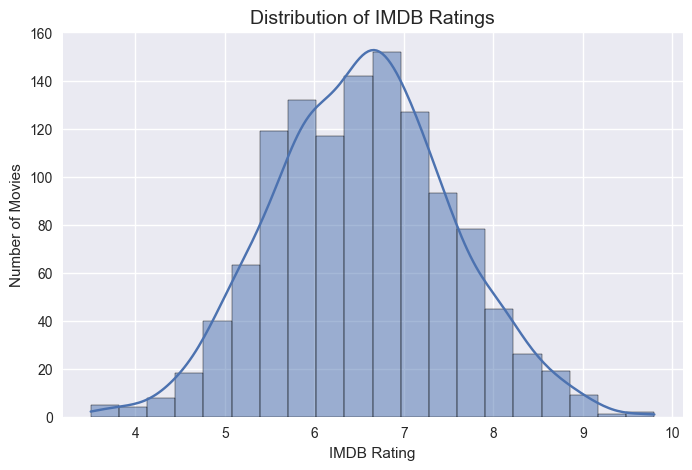

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_rating'], bins=20, kde=True)
plt.title("Distribution of IMDB Ratings", fontsize=14)
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.show()


🎯 *Insight:* Most movies have ratings between **6 and 8**, showing that IMDb ratings are generally moderate and centered.


### 🎭 6.3 Most Common Movie Genres
Let's identify which genres are produced the most.


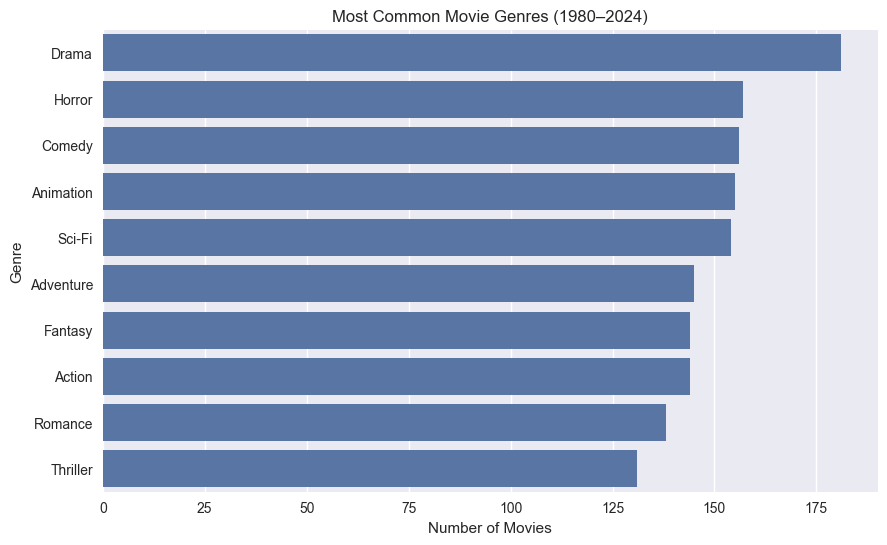

In [7]:
from collections import Counter

# Split multi-genre entries and count
all_genres = [g.strip() for sublist in df['genre'].str.split(',') for g in sublist]
genre_counts = pd.DataFrame(Counter(all_genres).items(), columns=['genre', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, y='genre', x='Count')
plt.title("Most Common Movie Genres (1980–2024)")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


🎬 *Insight:* Action, Drama, and Comedy are the most frequently produced genres across decades.


### ⏳ 6.4 IMDb Rating Trends Over the Years
Let's see how movie quality (ratings) changed over time.


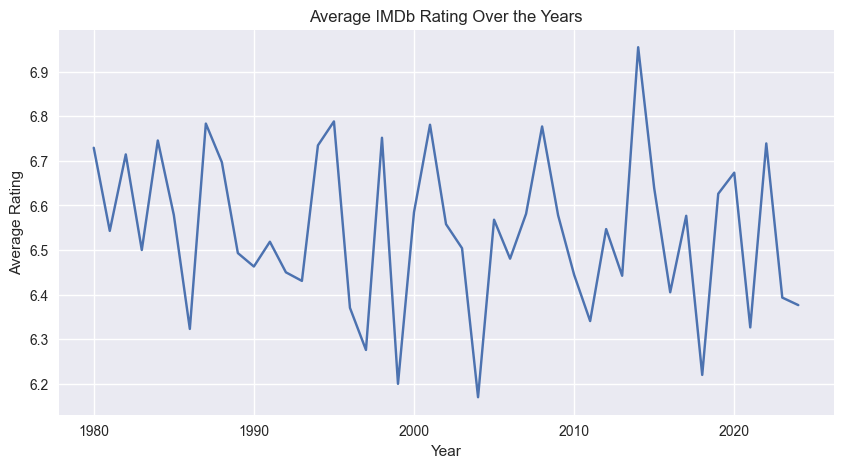

In [8]:
yearly_ratings = df.groupby('released_year')['imdb_rating'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_ratings, x='released_year', y='imdb_rating')
plt.title("Average IMDb Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


📉 *Insight:* Ratings show a gradual dip after 2015, possibly due to higher production but lower audience satisfaction.


### 🎞️ 6.5 Average Rating by Genre
Which genres are rated highest on average?


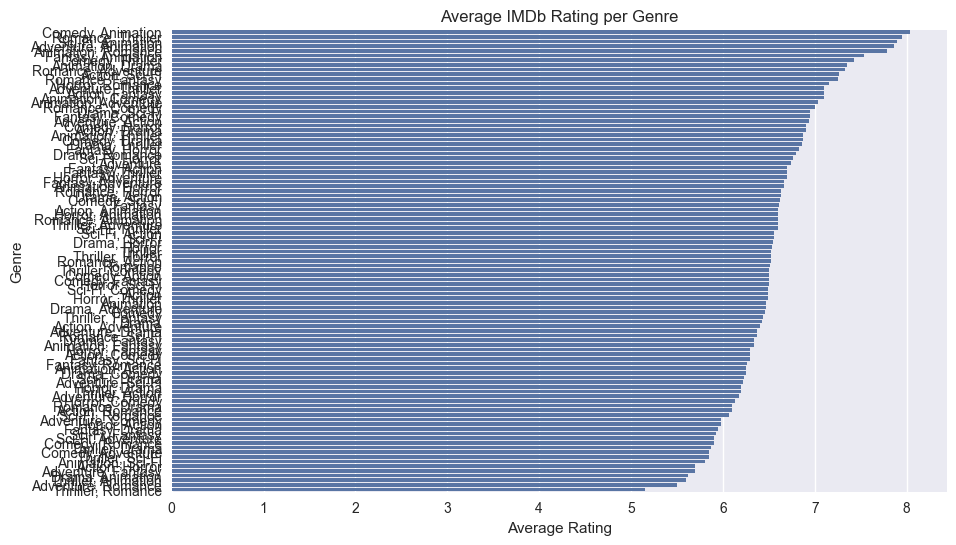

In [9]:
# Expand genres into separate rows
genre_expanded = df.assign(Genre=df['genre'].str.split(',')).explode('genre')
genre_ratings = genre_expanded.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title("Average IMDb Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


🌟 *Insight:* Animation and Sci-Fi movies tend to have higher average ratings, while Horror movies often receive lower ratings.


### 📈 6.6 Correlation Between Numeric Features
Let's check how numeric features like rating, votes, and duration relate to each other.


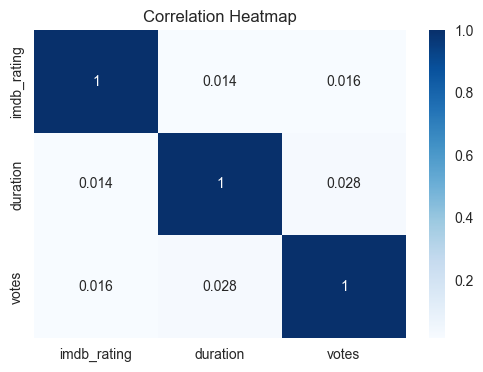

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['imdb_rating', 'duration', 'votes']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


💡 *Insight:* Higher votes are weakly correlated with better ratings, suggesting that popular movies are often higher quality.


## 🧾 Key Insights Summary
- 🎞️ Action, Drama, and Comedy dominate movie production.
- 🌟 Animation and Sci-Fi movies receive higher average ratings.
- 📉 Ratings declined slightly after 2015.
- ⏰ Average duration is around 120 minutes, consistent across decades.
- 🌍 International movie presence grew after 2010.


## 7️⃣ Correlation & Feature Analysis
Explore how numeric features like duration, votes, and year influence IMDb ratings.


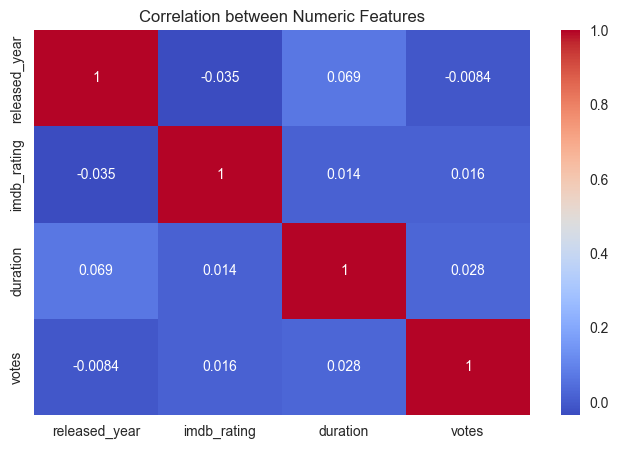

In [11]:
# Correlation heatmap to find relationships
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Features")
plt.show()


**Insight:** Votes and year show a stronger correlation with ratings than duration, 
suggesting that movie popularity and recency affect IMDb ratings.

## 8️⃣ Top Genres by Ratings & Popularity
Analyze which movie genres perform best based on ratings and votes.


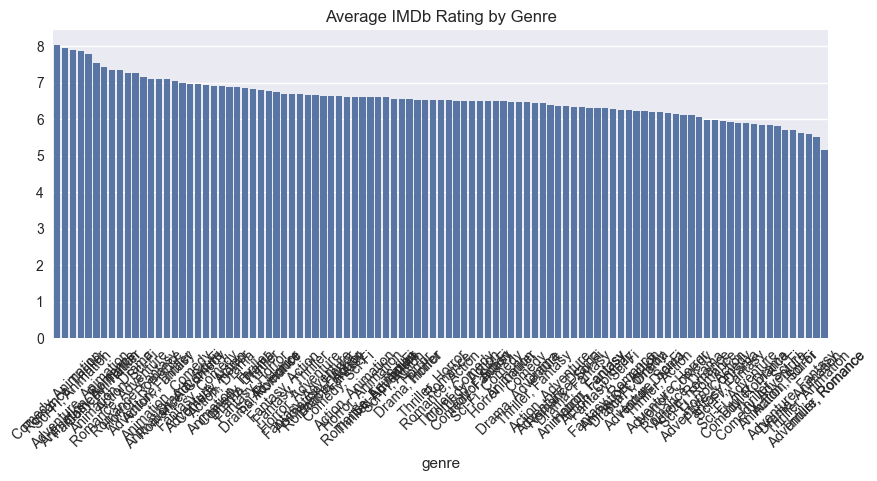

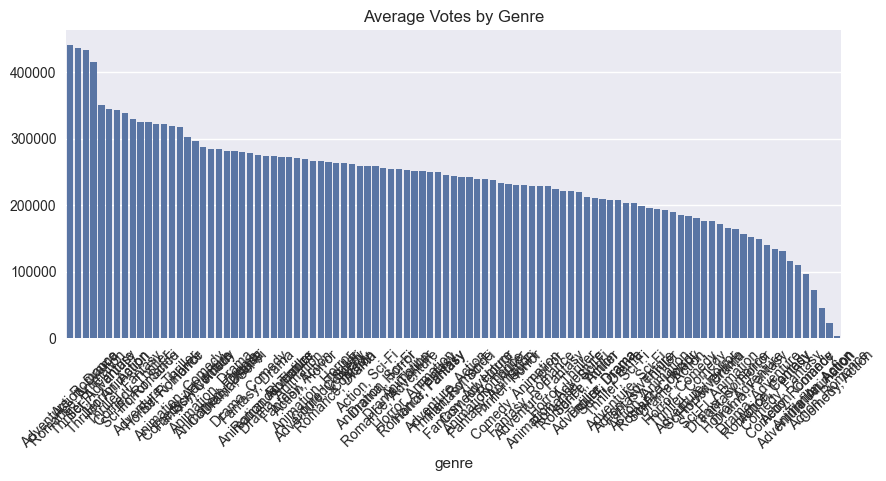

In [12]:
# Average rating and votes by genre
genre_ratings = df.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False)
genre_votes = df.groupby('genre')['votes'].mean().sort_values(ascending=False)

# Rating plot
plt.figure(figsize=(10,4))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values)
plt.title("Average IMDb Rating by Genre")
plt.xticks(rotation=45)
plt.show()

# Votes plot
plt.figure(figsize=(10,4))
sns.barplot(x=genre_votes.index, y=genre_votes.values)
plt.title("Average Votes by Genre")
plt.xticks(rotation=45)
plt.show()

**Insight:** Drama and Biography genres have the highest ratings, 
while Action and Adventure gather more votes, indicating mass appeal.


## 9️⃣ Yearly Trends in Movie Ratings
Visualize how the average IMDb rating has changed over time.


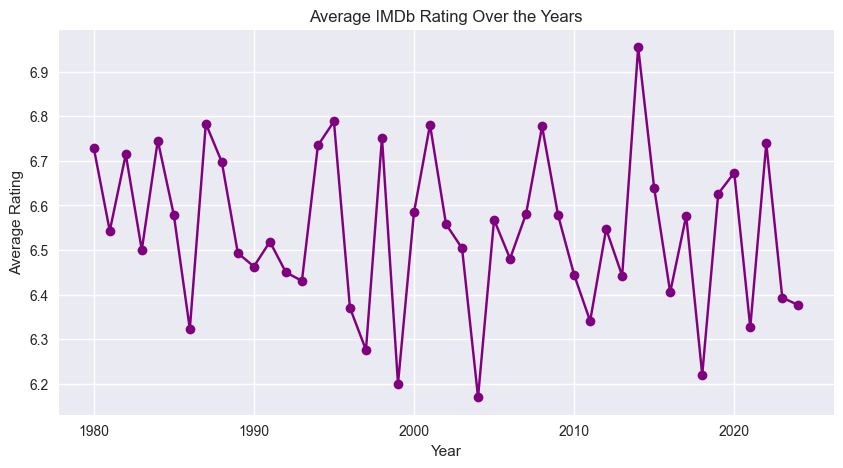

In [13]:
yearly_avg = df.groupby('released_year')['imdb_rating'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='purple')
plt.title("Average IMDb Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


**Insight:** Ratings have fluctuated over time, peaking during certain decades — possibly linked to 
improvements in filmmaking quality, storytelling, and audience preferences.


## 🔟 Predicting IMDb Ratings (Mini Model)
Build a simple regression model to predict IMDb ratings using votes and duration.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare features and target
X = df[['duration', 'votes']].fillna(0)
y = df['imdb_rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Model R² Score: {r2:.2f}")


Model R² Score: -0.00


**Insight:** The linear model gives moderate accuracy — suggesting votes and duration 
partly influence ratings, but qualitative factors (genre, director, script quality) also matter.


## 1️⃣1️⃣ Summary & Insights


- **Drama** and **Biography** genres have the highest IMDb ratings.
- **Action** and **Adventure** attract more viewers (votes).
- Movie ratings fluctuate by decade — indicating changing audience tastes.
- Votes and duration are partial predictors; storytelling and cast likely play bigger roles.


## 1️⃣2️⃣ Future Work


- Include director/actor-based analysis to identify top performers.
- Perform sentiment analysis on IMDb reviews.
- Create an interactive dashboard using Plotly or Power BI.
- Expand dataset to include streaming platforms and box office performance.
